In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
data = pd.read_pickle('auto.pkl')

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,before_1977
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   before_1977   398 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


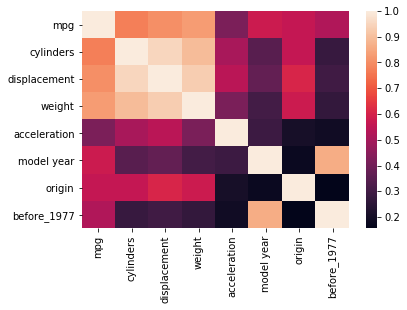

In [7]:
sns.heatmap(data.corr().abs())
plt.show()

In [14]:
X = data.drop(columns=['car name','mpg','horsepower'],axis=1)
#same as 
#X_cols = [c for c in data_num.columns.to_list() if c not in ['body_mass_g']]
#X=data_num[X_cols]
y = data.mpg

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred)}")

Training Scores:
R2: 0.8329748128250088
Mean Absolute Error: 2.5324750260338824
---
Testing Scores:
R2: 0.7712825203908199
Mean Absolute Error: 2.4966194356313203


In [35]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lr.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lr.intercept_))

Unpenalized Linear Regression Coefficients are:[-0.45254169  0.65674266 -5.15591059  0.44696504  2.18963019  1.0914438
 -0.80256045]
Unpenalized Linear Regression Intercept:23.515100671140935


In [28]:
lasso = Lasso(alpha=.5)
lasso.fit(X_train_scaled, y_train)
y_train_pred_l1 = lasso.predict(X_train_scaled)
y_test_pred_l1 = lasso.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred_l1)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_l1)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred_l1)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred_l1)}")

Training Scores:
R2: 0.8240478217295131
Mean Absolute Error: 2.5225325143102184
---
Testing Scores:
R2: 0.7716025359502596
Mean Absolute Error: 2.437054332452064


In [24]:
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

Lasso Regression Coefficients are:[-0.15524706 -0.         -4.86820099  0.3095495   2.12480628  0.97351918
 -0.77663875]
Lasso Linear Regression Intercept:23.515100671140935


In [29]:
ridge = Ridge(alpha=0.5)

In [30]:
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
y_train_pred_l2 = ridge.predict(X_train_scaled)
y_test_pred_l2 = ridge.predict(X_test_scaled)

print("Training Scores:")
print(f"R2: {r2_score(y_train, y_train_pred_l2)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred_l2)}")
print("---")
print("Testing Scores:")
print(f"R2: {r2_score(y_test, y_test_pred_l2)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred_l2)}")

Training Scores:
R2: 0.8329609446000479
Mean Absolute Error: 2.531388831196509
---
Testing Scores:
R2: 0.770013437931172
Mean Absolute Error: 2.5006266320674246


In [33]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

Ridge Regression Coefficients are:[-0.4455046   0.55696623 -5.07032246  0.43396301  2.17019153  1.0874891
 -0.81661096]
Ridge Linear Regression Intercept:23.515100671140935


In [27]:
test = ['Good morning', 'Buenos días', 'Zǎoshang hǎo', 'Bonjour',
        'Dzień dobry', 'Guten morgen', 'Ohayōgozaimasu', 'Sabaah alkhyr']
results=[]

def reverse_the_strings(string):
    for x in string:
        rev=x[::-1]
        results.append(rev)
    return results


print (reverse_the_strings(test))

['gninrom dooG', 'saíd soneuB', 'oǎh gnahsoǎZ', 'ruojnoB', 'yrbod ńeizD', 'negrom netuG', 'usamiazogōyahO', 'ryhkla haabaS']


********************

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn import tree

In [3]:
df= pd.read_csv('auto-mpg-classification.csv')

In [4]:
X = df.drop(columns='target')
y = df.target

In [5]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [6]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: target, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                   random_state=7,
                                                   stratify=y)

In [9]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 207 to 336
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     274 non-null    int64  
 1   displacement  274 non-null    float64
 2   horsepower    274 non-null    int64  
 3   weight        274 non-null    int64  
 4   acceleration  274 non-null    float64
 5   model year    274 non-null    int64  
 6   origin        274 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 17.1 KB


In [10]:
X_train.describe()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,5.423358,193.034672,104.788321,2978.711679,15.498540,76.000000,1.562044
std,1.706367,103.634694,38.127976,847.993422,2.699898,3.640432,0.801659
min,3.000000,68.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,4.000000,105.500000,76.500000,2248.250000,13.725000,73.000000,1.000000
50%,4.000000,148.500000,92.500000,2803.500000,15.500000,76.000000,1.000000
75%,8.000000,260.000000,125.000000,3573.000000,17.000000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

In [12]:
X_train.columns.to_list()

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

In [13]:
from sklearn.linear_model import LogisticRegression
# Lets set up a Logistic Regression Pipeline

encoder = OneHotEncoder(drop='first')
catvar = ['cylinders','origin']
catvarid = [X_train.columns.tolist().index(column) for column in catvar]

pipe_lr = make_pipeline(SimpleImputer(),
                       ColumnTransformer([('encoder', encoder, catvarid)],
                                        remainder='passthrough',
                                        sparse_threshold=0),
                       StandardScaler(),
                       LogisticRegression())
pipe_lr.steps

[('simpleimputer', SimpleImputer()),
 ('columntransformer',
  ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                    transformers=[('encoder', OneHotEncoder(drop='first'),
                                   [0, 6])])),
 ('standardscaler', StandardScaler()),
 ('logisticregression', LogisticRegression())]

In [14]:
# Lets fit the LogReg on our training and calculate our roc_auc_scores
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  [0, 6])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [15]:
train_pred = pipe_lr.predict_proba(X_train)
test_pred = pipe_lr.predict_proba(X_test)

In [16]:
train_score = roc_auc_score(y_train, train_pred[:,1])
test_score = roc_auc_score(y_test, test_pred[:,1])
print(f"Train ROC-AUC score:{train_score}")
print(f"Test ROC-AUC score:{test_score}")

Train ROC-AUC score:0.9917992223400495
Test ROC-AUC score:0.9920454545454546


In [17]:
from sklearn.tree import DecisionTreeClassifier
# Fit the model and lets see the tree

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
train_pred = dt.predict_proba(X_train)
test_pred = dt.predict_proba(X_test)
train_score = roc_auc_score(y_train, train_pred[:,1])
test_score = roc_auc_score(y_test, test_pred[:,1])

print(f"Train ROC-AUC score:{train_score}")
print(f"Test ROC-AUC score:{test_score}")

Train ROC-AUC score:1.0
Test ROC-AUC score:0.8996212121212122


In [18]:
grid_params = {
    'max_depth': [3,4,5,6,7],
    'max_features' : ['sqrt','log2'],
    'class_weight' : [None, 'balanced'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt, grid_params, cv=4, scoring='roc_auc')
grid_search.fit(X_train, y_train)
dt_grid = grid_search.best_estimator_
dt_grid.fit(X_train, y_train)
train_pred = dt.predict_proba(X_train)
test_pred = dt.predict_proba(X_test)
train_score = roc_auc_score(y_train, train_pred[:,1])
test_score = roc_auc_score(y_test, test_pred[:,1])

print(f"Train ROC-AUC score:{train_score}")
print(f"Test ROC-AUC score:{test_score}")

Train ROC-AUC score:1.0
Test ROC-AUC score:0.8996212121212122


In [19]:
dt_grid

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features='sqrt')